<a href="https://colab.research.google.com/github/maskot1977/ComputerExercises2022/blob/k8CE29y7yhhs/12%E6%9C%8813%E6%97%A5%E8%AC%9B%E7%BE%A9%E5%88%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第71章：２次元ヒートマップ

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def heatmap(f, x_min=-12, x_max=12, y_min=-12, y_max=12, h=0.1, drawline=False, cmap=plt.cm.jet):
    x_mg, y_mg = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = [[f([x, y]) for x, y in zip(xx, yy)] for xx, yy in zip(x_mg,y_mg)]
    plt.axes().set_aspect('equal')
    #plt.contourf(x_mg, y_mg, Z, cmap=cmap)
    plt.imshow(Z, origin='lower', extent=[x_min, x_max, y_min, y_max], cmap=cmap)
    plt.colorbar()
    if drawline:
        plt.contour(x_mg, y_mg, Z, colors='black')
    plt.grid()
    #plt.show()

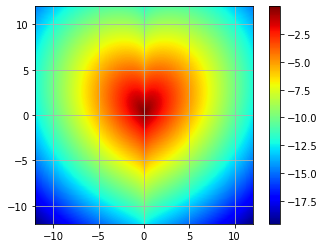

In [ ]:
f = lambda x: -np.sqrt(x[0]**2 + (x[1] - np.sqrt(np.abs(x[0])))**2)
heatmap(f, drawline=False)

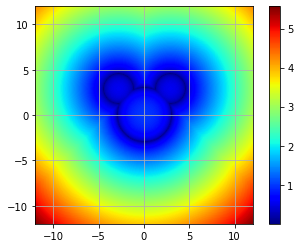

In [ ]:
g = lambda x: np.sqrt(np.abs(np.minimum((x[0]/3)**2 + (x[1]/3)**2 - 1, (np.abs(x[0]/3) - 0.95)**2 + (x[1]/3 - 0.95)**2 - 0.55**2)))
heatmap(g, drawline=False)

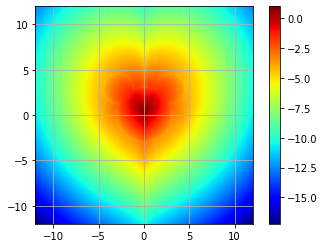

In [ ]:
h = lambda x: f(x) + np.sqrt(np.abs(g(x)))
heatmap(h, drawline=False)

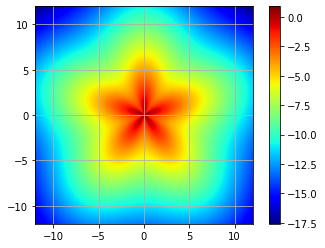

In [ ]:
k = lambda x: np.cos(5 * np.arctan2(x[0],  x[1])) - np.linalg.norm([x[0], x[1]])
heatmap(k, drawline=False)

In [ ]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))
tanh = lambda x: (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
relu = lambda x: np.maximum(0, x)

In [ ]:
activation = sigmoid
f1 = lambda x: activation(x[1] + 3)

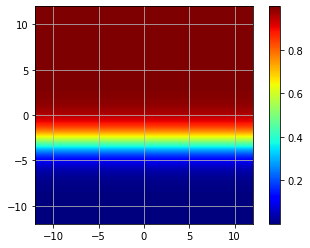

In [ ]:
heatmap(f1, drawline=False)

In [ ]:
f1 = lambda x: activation(x[1] + 3)
f2 = lambda x: activation(x[0] - x[1] + 4)
f3 = lambda x: activation(- x[0] - x[1] + 4)

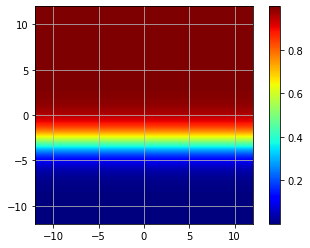

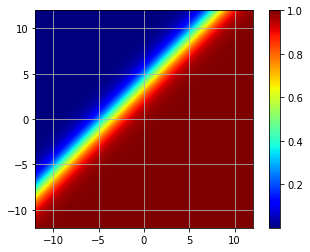

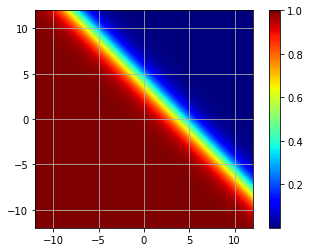

In [ ]:
activation = sigmoid
for func in [f1, f2, f3]:
    heatmap(func, drawline=False)
    plt.show()

In [ ]:
f1 = lambda x: activation(x[1] + 3)
f2 = lambda x: activation(x[0] - x[1] + 4)
f3 = lambda x: activation(- x[0] - x[1] + 4)
g1 = lambda x: activation(f1(x) + f2(x))
g2 = lambda x: activation(f1(x) + 2 * f2(x) - 3 * f3(x) + 3)
g3 = lambda x: activation(2 * f1(x) - 2 * f2(x) + 5 * f3(x) - 6)

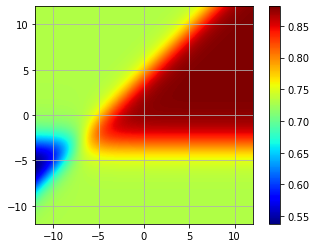

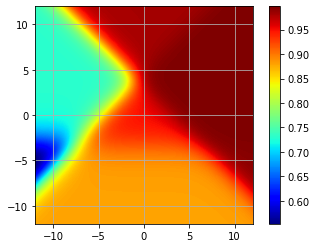

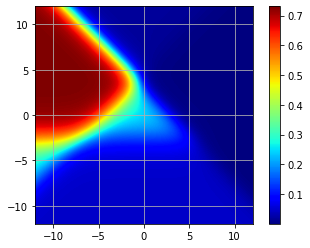

In [ ]:
for func in [g1, g2, g3]:
    heatmap(func, drawline=False)
    plt.show()

In [ ]:
f1 = lambda x: activation(x[1] + 3)
f2 = lambda x: activation(x[0] - x[1] + 4)
f3 = lambda x: activation(- x[0] - x[1] + 4)
g1 = lambda x: activation(f1(x) + f2(x))
g2 = lambda x: activation(f1(x) + 2 * f2(x) - 3 * f3(x) + 3)
g3 = lambda x: activation(2 * f1(x) - 2 * f2(x) + 5 * f3(x) - 6)
h = lambda x: activation(g1(x) + 2 * g2(x) + g3(x) - 2)

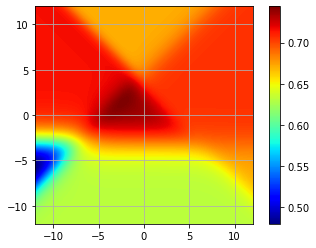

In [ ]:
for func in [h]:
    heatmap(func, drawline=False)
    plt.show()

# 第72章：勾配降下法

In [ ]:
f = lambda x: x**2 + 2 * x + 1
g = lambda x: x**4 - 4 * x**3 - 36 * x**2

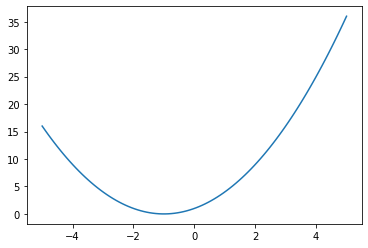

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_latent = np.linspace(-5, 5, 100)
plt.plot(x_latent, f(x_latent))
plt.show()

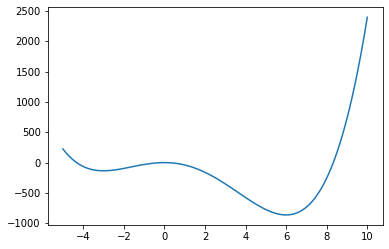

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_latent = np.linspace(-5, 10, 100)
plt.plot(x_latent, g(x_latent))
plt.show()

In [ ]:
def numeric_differentiation(f, x, h=1e-4):
    return (f(x + h) - f(x - h)) / (2 * h)

In [ ]:
def gradient_decent(f, x0, lr=1e-4, step_num=400, h=1e-4):
    x = x0
    for _ in range(step_num):
        grad = numeric_differentiation(f, x, h=h)
        x = x - lr * grad
    return x

In [ ]:
gradient_decent(f, 4)

3.61554480250226

In [ ]:
def gradient_decent(f, x0, lr=1e-4, step_num=400, h=1e-4):
    grad_history = []
    x_history = []
    x = x0
    for _ in range(step_num):
        grad = numeric_differentiation(f, x, h=h)
        x = x - lr * grad
        grad_history.append(grad)
        x_history.append(x)
    return x, x_history, grad_history

In [ ]:
x, x_history, grad_history = gradient_decent(f, 4)

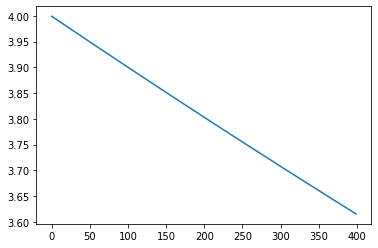

In [ ]:
plt.plot(x_history)

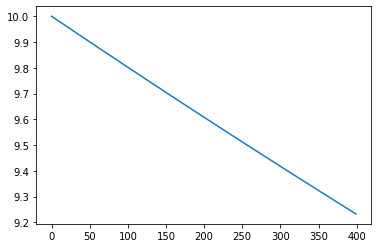

In [ ]:
plt.plot(grad_history)

In [ ]:
x, x_history, grad_history = gradient_decent(f, 4, lr=1e-2)

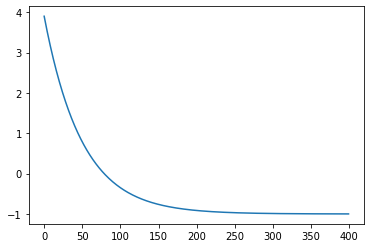

In [ ]:
plt.plot(x_history)

In [ ]:
x, x_history, grad_history = gradient_decent(f, 4, h=1e-2)

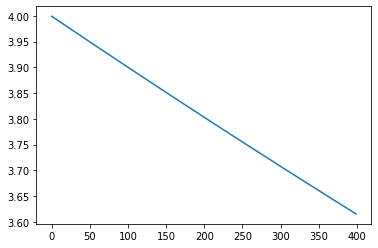

In [ ]:
plt.plot(x_history)

# 第73章：多変数の勾配降下法

In [ ]:
f = lambda x: x[0] **2 + x[1] **2 / 10

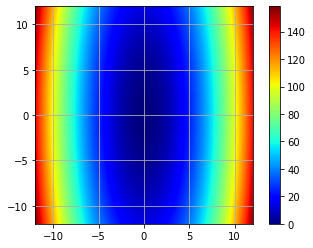

In [ ]:
heatmap(f)

In [ ]:
def numeric_differentiation(f, x, h=1e-4):
    grad = np.zeros_like(x)
    for i in range(len(x)):
        tmp = x[i]

        # f(x+h)
        x[i] = tmp + h
        fxh1 = f(x)

        # f(x-h)
        x[i] = tmp - h
        fxh2 = f(x)

        grad[i] = (fxh1 - fxh2) / (2*h)
        x[i] = tmp

    return grad

In [ ]:
x, x_history, grad_history = gradient_decent(f, [10, 10], lr=1e-2)

In [ ]:
x

array([3.09651515e-03, 4.49419034e+00])

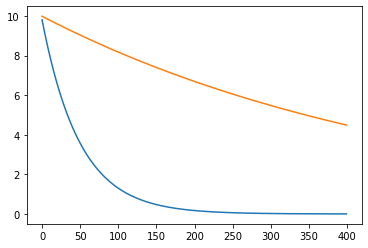

In [ ]:
plt.plot(x_history)

In [ ]:
x, x_history, grad_history = gradient_decent(f, [10, 10], lr=1e-2, step_num=3000)

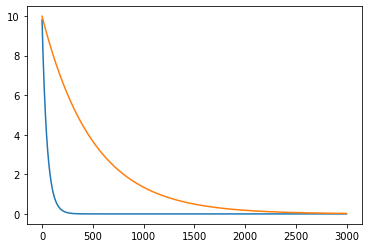

In [ ]:
plt.plot(x_history)

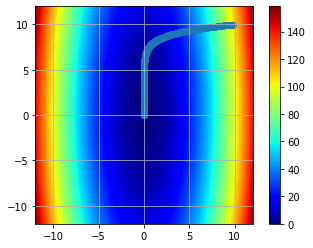

In [ ]:
heatmap(f)
plt.scatter([x[0] for x in x_history], [x[1] for x in x_history])

# 第74章：慣性つき勾配降下法

In [ ]:
def moment_GD(f, x0, lr=1e-1, step_num=500, h=1e-4, momentum=0.9):
    grad_history=[]
    x_history=[]
    v_history=[]
    x = x0
    v = np.zeros_like(x0)
    for _ in range(step_num):
        grad = numeric_differentiation(f, x, h=h)
        grad_history.append(grad)
        x_history.append(x)
        v_history.append(v)
        v = momentum * v - lr * grad
        x = x + v
    
    return x_history, grad_history, v_history

In [ ]:
x_history, grad_history, v_history = moment_GD(f, [10, 10], step_num=150)

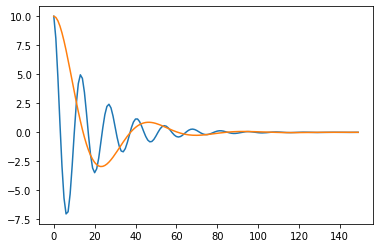

In [ ]:
plt.plot(np.array(x_history))

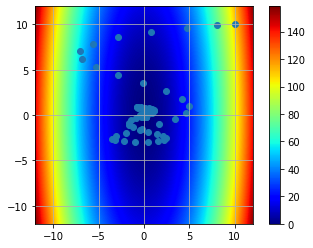

In [ ]:
heatmap(f)
plt.scatter([x[0] for x in np.array(x_history)], [x[1] for x in np.array(x_history)])

# 第75章：適応的モーメント推定 Adam

In [ ]:
def adam(f, x0, lr=1e-2, beta1=0.9, beta2=0.999, step_num=500, h=1e-4, epsilon=1e-8):
    grad_history = []
    x_history = []
    v_history = []
    m_history = []
    x = x0
    v = np.zeros_like(x0)
    m = np.zeros_like(x0)
    for t in range(step_num):
        grad = numeric_differentiation(f, x, h=h)
        x_history.append(x)
        v_history.append(v)
        m_history.append(m)
        m = m + (1-beta1) * (grad - m)
        v = v + (1-beta2) * (grad**2 - v)
        lr_t = lr * (1 - beta2**(t+2))**0.5 /(1 - beta1**(t+2))
        x = x - lr_t * m / (np.abs(v) + epsilon)**0.5
    
    return x_history, grad_history, v_history, m_history

In [ ]:
x_history, grad_history, v_history, m_history = adam(f, [10, 10], lr=1e-1)

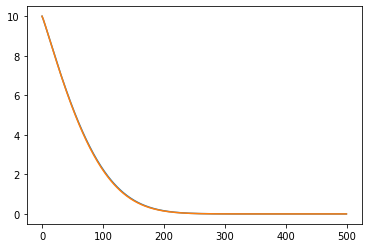

In [ ]:
plt.plot(np.array(x_history))

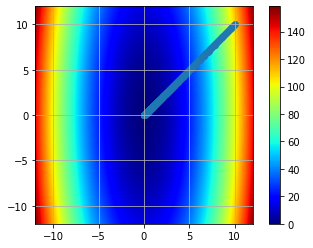

In [ ]:
heatmap(f)
plt.scatter([x[0] for x in np.array(x_history)], [x[1] for x in np.array(x_history)])

# 第76章：Adamによる多項式近似

In [ ]:
X = [-10,  -8,  -6,  -4,  -2,   0,   2,   4,   6,   8,  10]
Y_observed = [1.12, 0.28, -0.18, -0.27, -0.13, 0.21, 0.36, 0.49, 0.42, -0.05, -0.85]

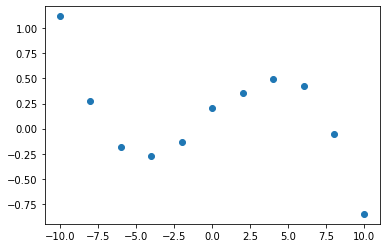

In [ ]:
plt.scatter(X, Y_observed)
plt.show()

In [ ]:
class Polynominal:
    def __init__(self, x_observed, y_observed):
        self.x_observed = x_observed
        self.y_observed = y_observed
        self.coeff = None

    def predict(self, x_latent):
        y = 0
        for i in range(len(self.coeff)):
            y += self.coeff[i] * x_latent ** i
        return y

    def mean_squared_error(self, y, t):
        return 0.5 * np.sum((y - t)**2)

    def __call__(self, w):
        self.coeff = w
        y_pred = self.predict(self.x_observed)
        return self.mean_squared_error(self.y_observed, y_pred)

In [ ]:
X = np.array(X)
Y_observed = np.array(Y_observed)
objective = Polynominal(X, Y_observed)
history = adam(objective, np.random.rand(4), step_num=20000)

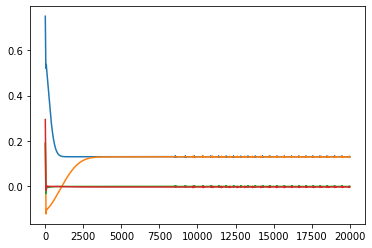

In [ ]:
plt.plot(history[0])

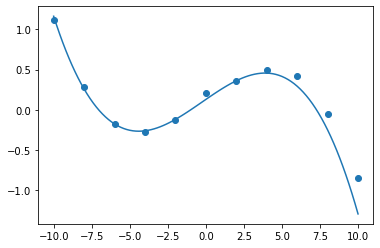

In [ ]:
x_latent = np.linspace(-10, 10, 101)
plt.scatter(X, Y_observed)
plt.plot(x_latent, objective.predict(x_latent))